In [31]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import nltk
from tqdm.notebook import tqdm
from collections import defaultdict
nltk.download('vader_lexicon')

months = ['December', 'January', 'February', 'March', 'April', 'May']

In [32]:
LanguageP = defaultdict(lambda: [])
LanguageNP = defaultdict(lambda: [])
for month in tqdm(months):
    for day in [0, 1, 2, 3, 4]:
        if month == 'may' and day == 4:
            continue
        for j in [1,2,3,4]:
        tweetsP = pd.read_json('Data/Text/Processed/' + str(month) + str(day) + str(j)).T
        results = []
        for text in tweetsP['text']:
            pol_score = SIA().polarity_scores(text) # run analysis
            pol_score['text'] = text # add headlines for viewing
            results.append(pol_score)

        tweetsP['Score'] = pd.DataFrame(results)['compound']
        LanguageP[j].append(np.average(tweetsP['Score']))

[nltk_data] Downloading package vader_lexicon to C:\Users\Aiden
[nltk_data]     Williams\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/3 [00:00<?, ?it/s]

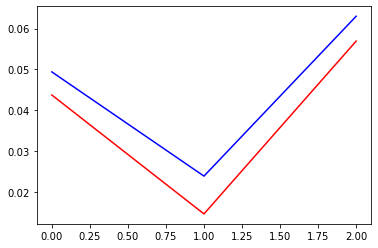

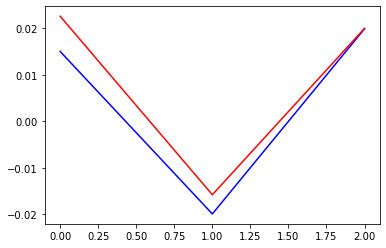

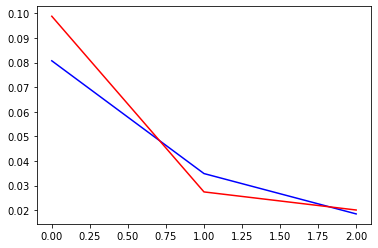

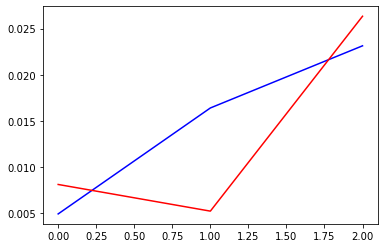

In [41]:
import matplotlib.pyplot as plt

plt.plot(LanguageP[1], color='b')
plt.plot(LanguageNP[1], color='r')
plt.show()

plt.plot(LanguageP[2], color='b')
plt.plot(LanguageNP[2], color='r')
plt.show()

plt.plot(LanguageP[3], color='b')
plt.plot(LanguageNP[3], color='r')
plt.show()

plt.plot(LanguageP[4], color='b')
plt.plot(LanguageNP[4], color='r')
plt.show()